# MNIST Hand Written Digits and Character Classification 

## Import Required Libraries

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.metrics import classification_report

## Load The Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Lets Check the length of dataset

In [ ]:
print('Length of X_train :',len(X_train))
print('Length of y_train :',len(y_train))
print('Length of X_test :',len(X_test))
print('Length of y_test :',len(y_test))

Length of X_train : 60000
Length of y_train : 60000
Length of X_test : 10000
Length of y_test : 10000


## Lets have a look at our images

In [ ]:
def show_img(dataset):
  rand_nums = np.random.randint(1,len(dataset), size=9)
  j=0
  for i in rand_nums:
    # define subplot
    plt.subplot(330+1+j)
    # plot raw pixel data
    plt.imshow(dataset[i], cmap=plt.get_cmap('gray'))
    j+=1
  # show the figure
  plt.show()

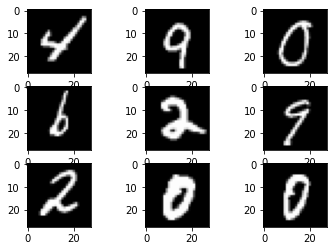

In [ ]:
show_img(X_train)

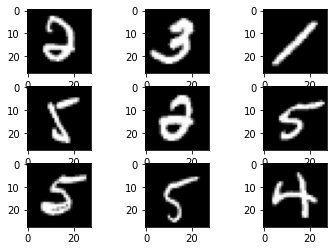

In [ ]:
show_img(X_train)

## Checking shape of our images

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Data Preprocessing

### Flattening and normalising images for training ANN

In [ ]:
def flatten_normalize(dataset):
  dataset = dataset.reshape((dataset.shape[0], 28 * 28 * 1))
  dataset = dataset.astype("float32") / 255.0
  return dataset
def denormflat(dataset):
  dataset = dataset.reshape((dataset.shape[0],28,28))
  dataset = dataset.astype("float32") * 255.0
  return dataset


In [ ]:
X_train_fn = flatten_normalize(X_train)
X_test_fn = flatten_normalize(X_test)

### Convert the labels from integers to vectors

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

## Using GPU

### Find Available GPU

In [ ]:
def check_available_gpus():
    local_devices = device_lib.list_local_devices()
    gpu_names = [x.name for x in local_devices if x.device_type == 'GPU']
    gpu_num = len(gpu_names)

    print('{0} GPUs are detected : {1}'.format(gpu_num, gpu_names))

    return gpu_num

In [ ]:
d = check_available_gpus()
d

1 GPUs are detected : ['/device:GPU:0']


1

## ANN

###Feed Forward Neural Network

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

###Learning Rate Scheduling

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

### Compiling Nerual Network

In [ ]:
model.compile(loss='CategoricalCrossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=['accuracy'])

### Training Neural Network with GPU

In [ ]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
  history=model.fit(X_train_fn, y_train, epochs=50, batch_size=32, validation_data=(X_test_fn, y_test))

Epoch 1/50
1875/1875 [==============================] - 10s 4ms/step - loss: 0.8216 - accuracy: 0.7594 - val_loss: 0.3515 - val_accuracy: 0.8991
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3304 - accuracy: 0.9032 - val_loss: 0.2895 - val_accuracy: 0.9166
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2824 - accuracy: 0.9173 - val_loss: 0.2517 - val_accuracy: 0.9282
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9269 - val_loss: 0.2274 - val_accuracy: 0.9322
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2217 - accuracy: 0.9347 - val_loss: 0.2047 - val_accuracy: 0.9382
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1971 - accuracy: 0.9423 - val_loss: 0.1980 - val_accuracy: 0.9424
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1781 - accuracy: 0.9477 - val_loss: 0.1724 - val_accuracy

### Neural Network Evaluation

### Epoch Vs. Loss

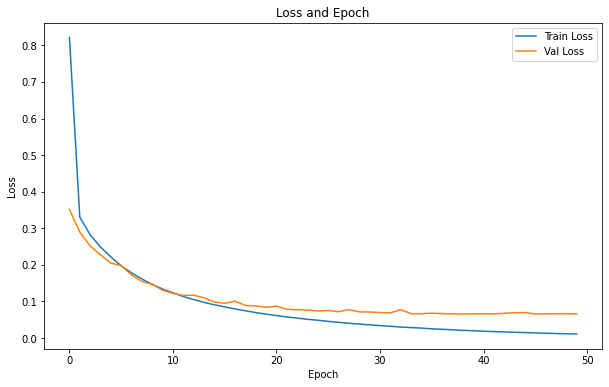

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss'])
plt.legend(['Train Loss','Val Loss'])
plt.title('Loss and Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch');

### Epcoh Vs. Accuracy

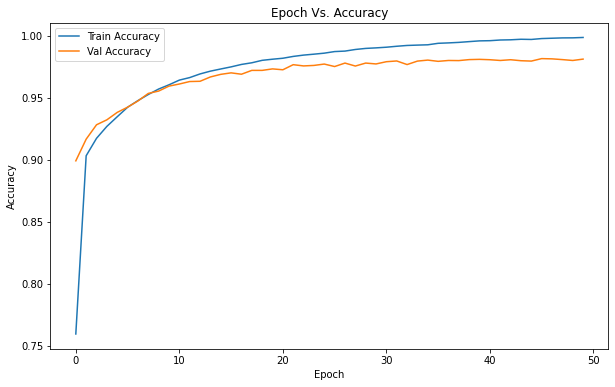

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy','Val Accuracy'])
plt.title('Epoch Vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch');

## Predicting with individual images

In [ ]:
def pred(image,true):
  img = image.reshape(784)
  img = img.astype("float32") / 255.0
  img = np.expand_dims(img, axis = 0)
  p=model.predict(img)
  plt.title(f'True:{np.argmax(true)}        Predicted: {np.argmax(p)}')
  plt.imshow(image,cmap=plt.get_cmap('gray'))

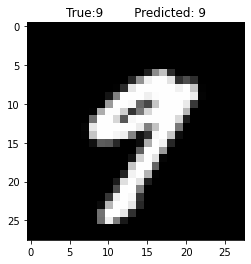

In [ ]:
pred(X_test[20],y_test[20])

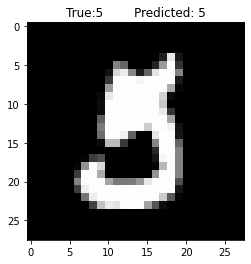

In [ ]:
pred(X_test[4360],y_test[4360])

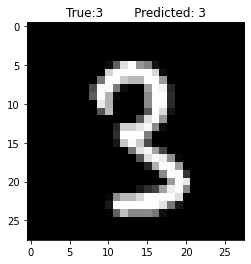

In [ ]:
pred(X_test[976],y_test[976])

## Prediction for Competetion

In [ ]:
!unzip './test' -d './'

In [ ]:
from PIL import Image, ImageOps
from numpy import asarray
import os
from tqdm import tqdm
import pandas as pd
preds={'filename':[],'label':[]}
for im in tqdm(os.listdir('./test')):
  # load the image
  image = Image.open('./test/'+im)
  # convert image to numpy array
  im2 = ImageOps.grayscale(image)
  im2 = asarray(im2)
  img = im2.reshape(784)
  img = img.astype("float32") / 255.0
  img = np.expand_dims(img, axis = 0)
  p=model.predict(img)
  preds['filename'].append(im)
  preds['label'].append(np.argmax(p))


100%|██████████| 21000/21000 [14:43<00:00, 23.76it/s]


In [ ]:
df.to_csv('test2.csv')